# Pragati Agarwal

## GRIP Task2: Finding Optimum Number of Clusters

Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dropping column Id as its just the serial number
df = df.drop(columns = 'Id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# We have to find the optimum number of clusters and so we'll make a new dataframe that won't have species as a column.
df1 = df.iloc[:,:4]
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Sepal Length has got good linear correlation with Petal Length and Petal Width. Whereas Petal dimensions are highly correlated to each other. Also, Sepal Width is fairly correlated to Petal Length and Petal Width.

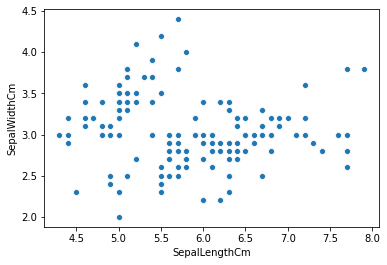

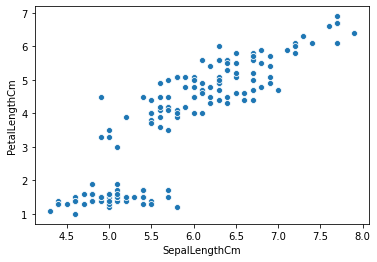

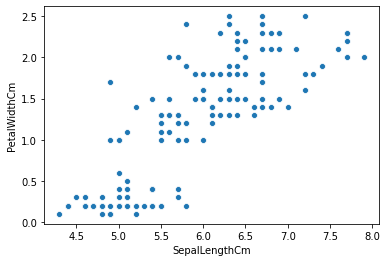

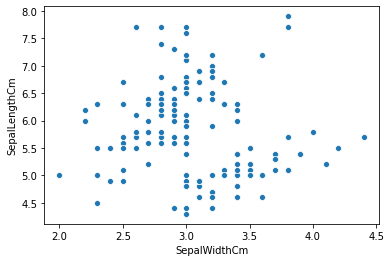

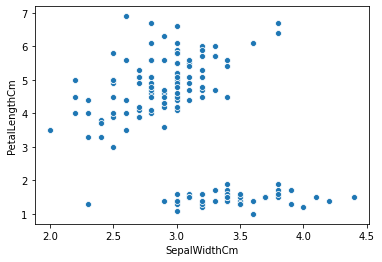

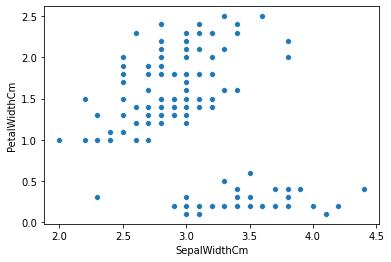

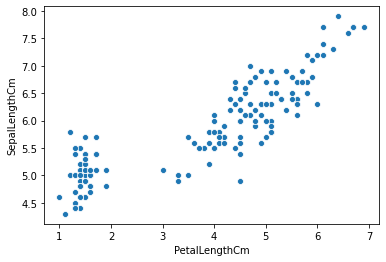

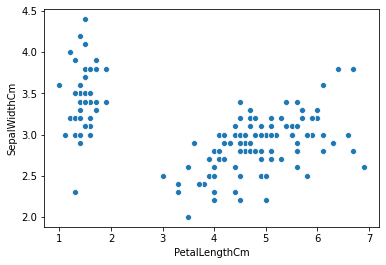

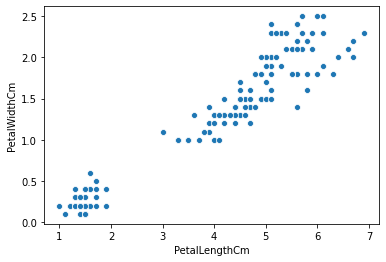

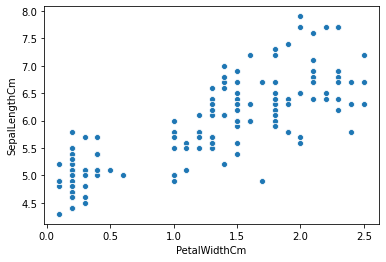

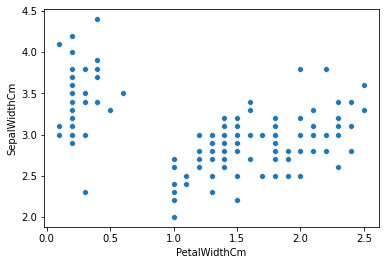

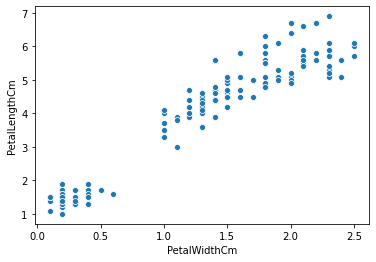

In [6]:
for i in df1.columns:
    for j in df1.columns:
        if i!=j:
            sns.scatterplot(i, j, data = df1)
            plt.show()

From above scatterplots the basic inference we can draw is yes, there is existence of two clusters atleast. As we can see all the scatter plots are divided clearly in two bundles.

* Information from the above plots lets finalise the range of number of clusters to be 2 to 9.
* Using KMeans algorithm we'll first plot Elbow Curve, Silhouette Score, Calinski Harabasz Score, so as to ascertain optimum number of clusters.

In [7]:
cluster_range = range(2,10)
cluster_wss = []

from sklearn.cluster import KMeans

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 25)
    clusters.fit(df1)
    cluster_wss.append(clusters.inertia_)

In [8]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_wss':cluster_wss})
clusters_df

,num_clusters,cluster_wss
0,2,152.368706
1,3,78.940841
2,4,57.345409
3,5,46.535582
4,6,38.930963
5,7,34.196982
6,8,29.889179
7,9,27.879288


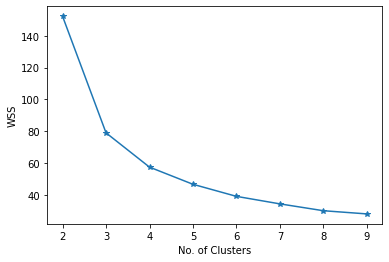

In [9]:
plt.xlabel('No. of Clusters')
plt.ylabel('WSS')
plt.plot(clusters_df['num_clusters'], clusters_df['cluster_wss'], marker = '*')
plt.show()

Plotting Elbow Curve above we can see the optimum number of clusters are '3' as the within cluster sum of squares doesn't decrease substantially after 3 clusters. This can also be ascertain by the 'clusters_df' dataframe above.

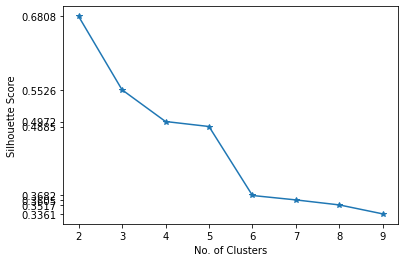

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 25)
    clusters.fit(df1)
    score = silhouette_score(df1, clusters.labels_)
    sil.append(score)
    
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.yticks(sil)
plt.plot(cluster_range, sil, marker = '*')
plt.show()    

* Silhouette score calculates the goodness of a clutering technique, ranging from -1 to 1.
* 1 being the best, 0 being no significant difference between clusters and -1 being the wrong clusters assigned.
* So from the above plot, number of clusters '2' seem to have high silhouette score than '3', but considering what elbow plot has given us we can still consider optimum number of clusters to be '3' as its silhouette score is pretty good.

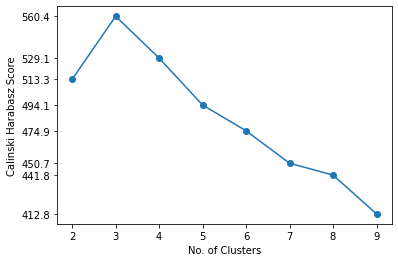

In [11]:
cal = []

for num_cluster in cluster_range:
    mod = KMeans(num_cluster, random_state=25)
    mod.fit(df1)
    score = calinski_harabasz_score(df1, mod.labels_)
    cal.append(score)
    
plt.plot(cluster_range, cal,marker = "o")
plt.xlabel('No. of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.xticks(cluster_range)
plt.yticks(cal)
plt.show()

* Calinski Harabasz Score is the ratio of between cluster variance to within cluster variance.
* From the above plot number of clusters '3' seem to give best Calinski Score.

In [12]:
df_2 = df1.copy()
df_3 = df1.copy()

In [13]:
kcluster = KMeans(n_clusters = 2, random_state = 25)
kcluster.fit(df_2)
df_2['clus'] = kcluster.predict(df_2)
kcluster = KMeans(n_clusters = 3, random_state = 25)
kcluster.fit(df_3)
df_3['clus'] = kcluster.predict(df_3)

In [14]:
# Let us see how are the averages for the respective number of clusters
clus_profile = df_2.groupby(df_2['clus']).mean()
clus_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clus,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.360377,1.562264,0.288679


In [15]:
clus_profile_ = df_3.groupby(df_3['clus']).mean()
clus_profile_

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clus,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


When taken 2 clusters


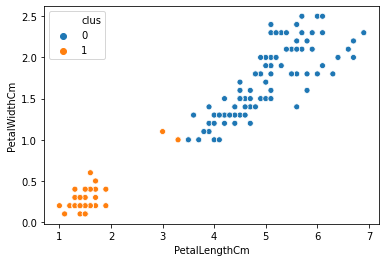

When taken 3 clusters


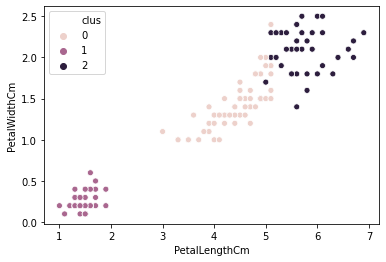

In [16]:
# Visulaising the number of clusters
# Plotting Petal Width with Petal Length
print('\033[1m' + 'When taken 2 clusters' + '\033[0m')
sns.scatterplot(df_2[df_2.columns[2]], df_2[df_2.columns[3]], hue = df_2[df_2.columns[-1]])
plt.show()
print('\033[1m' + 'When taken 3 clusters' + '\033[0m')
sns.scatterplot(df_3[df_3.columns[2]], df_3[df_3.columns[3]], hue = df_3[df_3.columns[-1]])
plt.show()

When taken 2 clusters


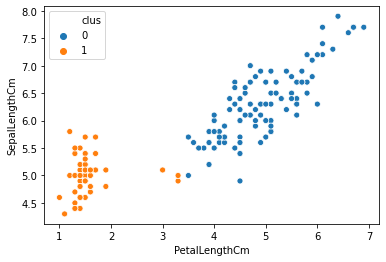

When taken 3 clusters


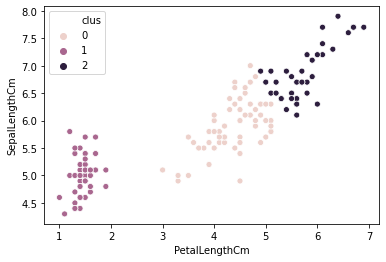

In [17]:
print('\033[1m' + 'When taken 2 clusters' + '\033[0m')
sns.scatterplot(df_2[df_2.columns[2]], df_2[df_2.columns[0]], hue = df_2[df_2.columns[-1]])
plt.show()
print('\033[1m' + 'When taken 3 clusters' + '\033[0m')
sns.scatterplot(df_3[df_3.columns[2]], df_3[df_3.columns[0]], hue = df_3[df_3.columns[-1]])
plt.show()

* On ascertaining number of clusters '2' and number of clusters '3', we can see 3 clusters better segregates the data not only visually but also the tables above clearly shows the average values of the variables are better defined.
* Hence the optimum number of Clusters are 3.